<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/jkh_predictions_with_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

data=np.load(path+'datajkh1.npy')
target=np.load(path+'targetjkh1.npy')

In [3]:
data.shape
target.shape

(2554,)

In [4]:
train_data=data[:1787]
train_target=target[:1787]

test_data=data[1787:]
test_target=target[1787:]

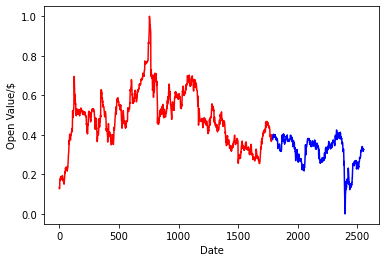

In [5]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1787,2554,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

In [7]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
51/51 [==============================] - 9s 44ms/step - loss: 0.0384 - mse: 0.0384 - mae: 0.1468 - mape: 30.0505 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0446 - val_mape: 14.0939
Epoch 2/200
51/51 [==============================] - 1s 14ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0549 - mape: 11.4448 - val_loss: 9.9521e-04 - val_mse: 9.9521e-04 - val_mae: 0.0276 - val_mape: 8.2182
Epoch 3/200
51/51 [==============================] - 1s 14ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0460 - mape: 9.3080 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0285 - val_mape: 8.6082
Epoch 4/200
51/51 [==============================] - 1s 15ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0456 - mape: 9.2775 - val_loss: 7.9801e-04 - val_mse: 7.9801e-04 - val_mae: 0.0243 - val_mape: 7.2205
Epoch 5/200
51/51 [==============================] - 1s 14ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0437 - mape: 9.0978 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0524 - val_mape

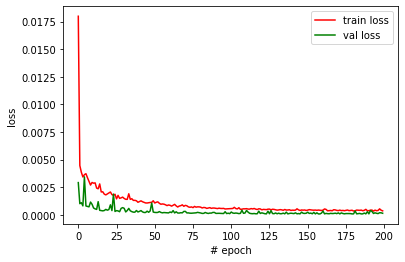

In [8]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)
print(result.shape)
print(test_target.shape)

r2 score: 0.9683883090716124
(767, 1)
(767,)


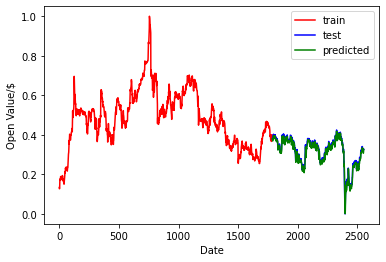

In [10]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1787,2554,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

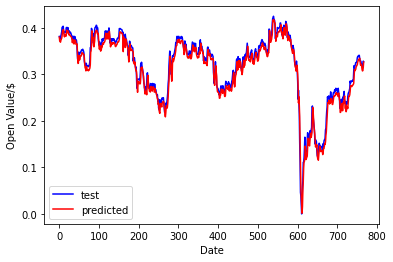

In [11]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [12]:
model.save_weights("JHK Stock Model new.h5")